## Energy Efficiency Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Our primary objective is to leverage the power of machine learning to predict heating and cooling loads based on these architectural attributes. This predictive modeling will contribute to the broader goal of optimizing energy efficiency in residential buildings.


### 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/242/energy+efficiency
- The data consists of 8 column and 768 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('ENB2012_data.csv')
df.columns = ['Relative Compactness (ratio)', 'Surface Area(m²)', 'Wall Area(m²)', 'Roof Area(m²)', 'Overall Height (m)', 'Orientation (Degrees)', 'Glazing Area(m²)', 'Glazing Area Distribution (Ratio)','Heating Load (kWh)', 'Cooling Load (kWh)']

#### Show Top 5 Records

In [3]:
df.head()

,Relative Compactness (ratio),Surface Area(m²),Wall Area(m²),Roof Area(m²),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Shape of the dataset

In [4]:
df.shape

(768, 10)

### 2.2 Dataset information

### Features (X1 to X8):
- Relative Compactness (X1): A measure of how compact the building is, often expressed as a ratio.
- Surface Area (X2): The total exterior surface area of the building.
- Wall Area (X3): The total area of the walls in the building.
- Roof Area (X4): The total area of the roof in the building.
- Overall Height (X5): The height of the building.
- Orientation (X6): The orientation of the building (e.g., North, South, East, West).
- Glazing Area (X7): The total area of windows (glazing) in the building.
- Glazing Area Distribution (X8): The distribution of glazing within the building

### Responses (y1 and y2):
- Heating Load (y1): The amount of heating required for the building.
- Cooling Load (y2): The amount of cooling required for the building.


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Relative Compactness (ratio)         0
Surface Area(m²)                     0
Wall Area(m²)                        0
Roof Area(m²)                        0
Overall Height (m)                   0
Orientation (Degrees)                0
Glazing Area(m²)                     0
Glazing Area Distribution (Ratio)    0
Heating Load (kWh)                   0
Cooling Load (kWh)                   0
dtype: int64

<Axes: >

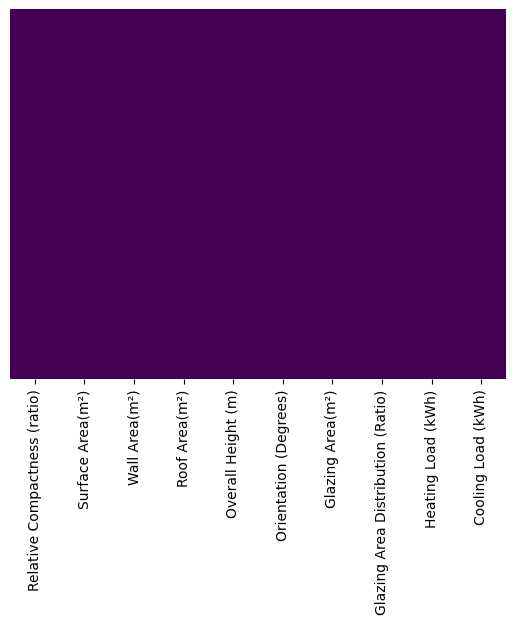

In [6]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Relative Compactness (ratio)       768 non-null    float64
 1   Surface Area(m²)                   768 non-null    float64
 2   Wall Area(m²)                      768 non-null    float64
 3   Roof Area(m²)                      768 non-null    float64
 4   Overall Height (m)                 768 non-null    float64
 5   Orientation (Degrees)              768 non-null    int64  
 6   Glazing Area(m²)                   768 non-null    float64
 7   Glazing Area Distribution (Ratio)  768 non-null    int64  
 8   Heating Load (kWh)                 768 non-null    float64
 9   Cooling Load (kWh)                 768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

Relative Compactness (ratio)          12
Surface Area(m²)                      12
Wall Area(m²)                          7
Roof Area(m²)                          4
Overall Height (m)                     2
Orientation (Degrees)                  4
Glazing Area(m²)                       4
Glazing Area Distribution (Ratio)      6
Heating Load (kWh)                   586
Cooling Load (kWh)                   636
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,Relative Compactness (ratio),Surface Area(m²),Wall Area(m²),Roof Area(m²),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh)
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#### Insight
1. **Mean Compactness:** Average relative compactness is 0.76, indicating buildings are generally energy-efficient.

2. **Height Impact:** Mean overall height is 5.25, influencing heating and cooling loads significantly.

3. **Glazing Area:** On average, 23.44% glazing area is present, impacting energy requirements.

4. **Heating Load:** Mean heating load is 22.31, showcasing overall energy consumption tendencies.

5. **Compactness Range:** Compactness varies (0.62 to 0.98), suggesting diversity in building designs and efficiencies.

### 3.7 Exploring Data

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Relative Compactness (ratio)', 'Surface Area(m²)', 'Wall Area(m²)', 'Roof Area(m²)', 'Overall Height (m)', 'Orientation (Degrees)', 'Glazing Area(m²)', 'Glazing Area Distribution (Ratio)', 'Heating Load (kWh)', 'Cooling Load (kWh)']

We have 0 categorical features : []


In [12]:
df.head()

,Relative Compactness (ratio),Surface Area(m²),Wall Area(m²),Roof Area(m²),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 3.8 Adding columns for "Glazing_Orientation", "Aspect Ratio" and "Total Area".
- Create interaction terms between features that might have a combined effect on heating and cooling loads, Considering both 'Glazing Area' and 'Glazing Area Distribution'.

In [13]:
# Creating interaction terms between glazing area and orientation
df['Glazing_Orientation'] = df['Glazing Area(m²)'] * df['Orientation (Degrees)']

- Calculate the aspect ratio of the building by dividing 'Surface Area' by 'Overall Height'. 

In [14]:
df['Aspect Ratio'] = df['Surface Area(m²)'] / df['Overall Height (m)']


- Combine surface area, wall area, and roof area into a single 'Total Area' feature.

In [15]:
df['Total Area'] = df['Surface Area(m²)'] + df['Wall Area(m²)'] + df['Roof Area(m²)']


In [16]:
df.head()

,Relative Compactness (ratio),Surface Area(m²),Wall Area(m²),Roof Area(m²),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh),Glazing_Orientation,Aspect Ratio,Total Area
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0.0,73.5,918.75
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0.0,73.5,918.75
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0.0,73.5,918.75
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0.0,73.5,918.75
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0.0,80.5,1004.50


### 3.8 Remove Redundant Features:
- Drop 'Surface Area', 'Wall Area', and 'Roof Area' if the 'Total Area' feature is created to avoid multicollinearity.

In [17]:
df = df.drop(['Surface Area(m²)', 'Wall Area(m²)', 'Roof Area(m²)'], axis=1)
df.head()

,Relative Compactness (ratio),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh),Glazing_Orientation,Aspect Ratio,Total Area
0,0.98,7.0,2,0.0,0,15.55,21.33,0.0,73.5,918.75
1,0.98,7.0,3,0.0,0,15.55,21.33,0.0,73.5,918.75
2,0.98,7.0,4,0.0,0,15.55,21.33,0.0,73.5,918.75
3,0.98,7.0,5,0.0,0,15.55,21.33,0.0,73.5,918.75
4,0.90,7.0,2,0.0,0,20.84,28.28,0.0,80.5,1004.50


In [18]:
df.describe()

,Relative Compactness (ratio),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh),Glazing_Orientation,Aspect Ratio,Total Area
count,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.764167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760,0.820312,149.333333,1166.812500
std,0.105777,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306,0.555291,64.947142,138.061118
min,0.620000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,0.000000,73.500000,918.750000
25%,0.682500,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,0.400000,86.625000,1065.750000
50%,0.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,0.750000,145.250000,1176.000000
75%,0.830000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,1.200000,211.750000,1261.750000
max,0.980000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,2.000000,231.000000,1396.500000


##  Insights

#### Glazing_Orientation:

- It ranges from 0 to 2.
- The mean is approximately 0.76, indicating a higher prevalence of certain orientations.
- The standard deviation is relatively low, suggesting limited variability.
#### Aspect Ratio:

- It ranges from 3.5 to 7.
- The mean is around 5.25, indicating a moderate aspect ratio.
- The standard deviation suggests some variability in building shapes.
#### Total Area:

- It ranges from around 73.5 to 231.
- The mean is approximately 149.33, indicating a moderate total area.
- The standard deviation shows variability in the sizes of buildings.

In [52]:

columns_to_move = ['Heating Load (kWh)', 'Cooling Load (kWh)']
df_without_columns = df.drop(columns=columns_to_move)
df_reordered = pd.concat([df_without_columns, df[columns_to_move]], axis=1)

# Display or save the modified DataFrame
df_reordered.to_csv('modified_data_after_eda.csv', index=False)
df_reordered.head(10)

,Relative Compactness (ratio),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Glazing_Orientation,Aspect Ratio,Total Area,Heating Load (kWh),Cooling Load (kWh)
0,0.98,7.0,2,0.0,0,0.0,73.5,918.75,15.55,21.33
1,0.98,7.0,3,0.0,0,0.0,73.5,918.75,15.55,21.33
2,0.98,7.0,4,0.0,0,0.0,73.5,918.75,15.55,21.33
3,0.98,7.0,5,0.0,0,0.0,73.5,918.75,15.55,21.33
4,0.90,7.0,2,0.0,0,0.0,80.5,1004.50,20.84,28.28
5,0.90,7.0,3,0.0,0,0.0,80.5,1004.50,21.46,25.38
6,0.90,7.0,4,0.0,0,0.0,80.5,1004.50,20.71,25.16
7,0.90,7.0,5,0.0,0,0.0,80.5,1004.50,19.68,29.60
8,0.86,7.0,2,0.0,0,0.0,84.0,1029.00,19.50,27.30
9,0.86,7.0,3,0.0,0,0.0,84.0,1029.00,19.95,21.97


In [20]:
min_values = df[['Glazing_Orientation', 'Glazing Area Distribution (Ratio)', 'Glazing Area(m²)']].min(axis=0)
max_values = df[['Glazing_Orientation', 'Glazing Area Distribution (Ratio)', 'Glazing Area(m²)']].max(axis=0)
mean_values = df[['Glazing_Orientation', 'Glazing Area Distribution (Ratio)', 'Glazing Area(m²)']].mean(axis=0)
median_values = df[['Glazing_Orientation', 'Glazing Area Distribution (Ratio)', 'Glazing Area(m²)']].median(axis=0)

# Print the results
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)
print("\nMean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)

Minimum values:
Glazing_Orientation                  0.0
Glazing Area Distribution (Ratio)    0.0
Glazing Area(m²)                     0.0
dtype: float64

Maximum values:
Glazing_Orientation                  2.0
Glazing Area Distribution (Ratio)    5.0
Glazing Area(m²)                     0.4
dtype: float64

Mean values:
Glazing_Orientation                  0.820312
Glazing Area Distribution (Ratio)    2.812500
Glazing Area(m²)                     0.234375
dtype: float64

Median values:
Glazing_Orientation                  0.75
Glazing Area Distribution (Ratio)    3.00
Glazing Area(m²)                     0.25
dtype: float64


### The contribution from these factors 'Glazing_Orientation', 'Glazing Area Distribution (Ratio)', 'Glazing Area(m²)' is quite negligible as compared to othe ones.

## 4. Exploring Data ( Visualization )
#### 4.1 Correlation Matrix with Heatmap 
- Correlation states how the features are related to each other or the target variable.

- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [53]:
df.corr()

,Relative Compactness (ratio),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh),Glazing_Orientation,Aspect Ratio,Total Area
Relative Compactness (ratio),1.000000e+00,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,-2.431689e-15,-8.907432e-01,-9.814802e-01
Overall Height (m),8.277473e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785,3.751230e-17,-9.886268e-01,-7.768831e-01
Orientation (Degrees),4.678592e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,4.722027e-01,-5.023346e-17,-4.462297e-17
Glazing Area(m²),-2.960552e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505,8.396892e-01,1.084876e-15,9.554754e-16
Glazing Area Distribution (Ratio),-7.107006e-16,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,1.788237e-01,2.074786e-16,1.840608e-15
Heating Load (kWh),6.222722e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862,2.256483e-01,-8.531195e-01,-5.578487e-01
Cooling Load (kWh),6.343391e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,1.823585e-01,-8.627093e-01,-5.765996e-01
Glazing_Orientation,-2.431689e-15,3.751230e-17,4.722027e-01,8.396892e-01,1.788237e-01,0.225648,0.182358,1.000000e+00,8.908265e-16,7.897957e-16
Aspect Ratio,-8.907432e-01,-9.886268e-01,-5.023346e-17,1.084876e-15,2.074786e-16,-0.853119,-0.862709,8.908265e-16,1.000000e+00,8.582182e-01
Total Area,-9.814802e-01,-7.768831e-01,-4.462297e-17,9.554754e-16,1.840608e-15,-0.557849,-0.576600,7.897957e-16,8.582182e-01,1.000000e+00


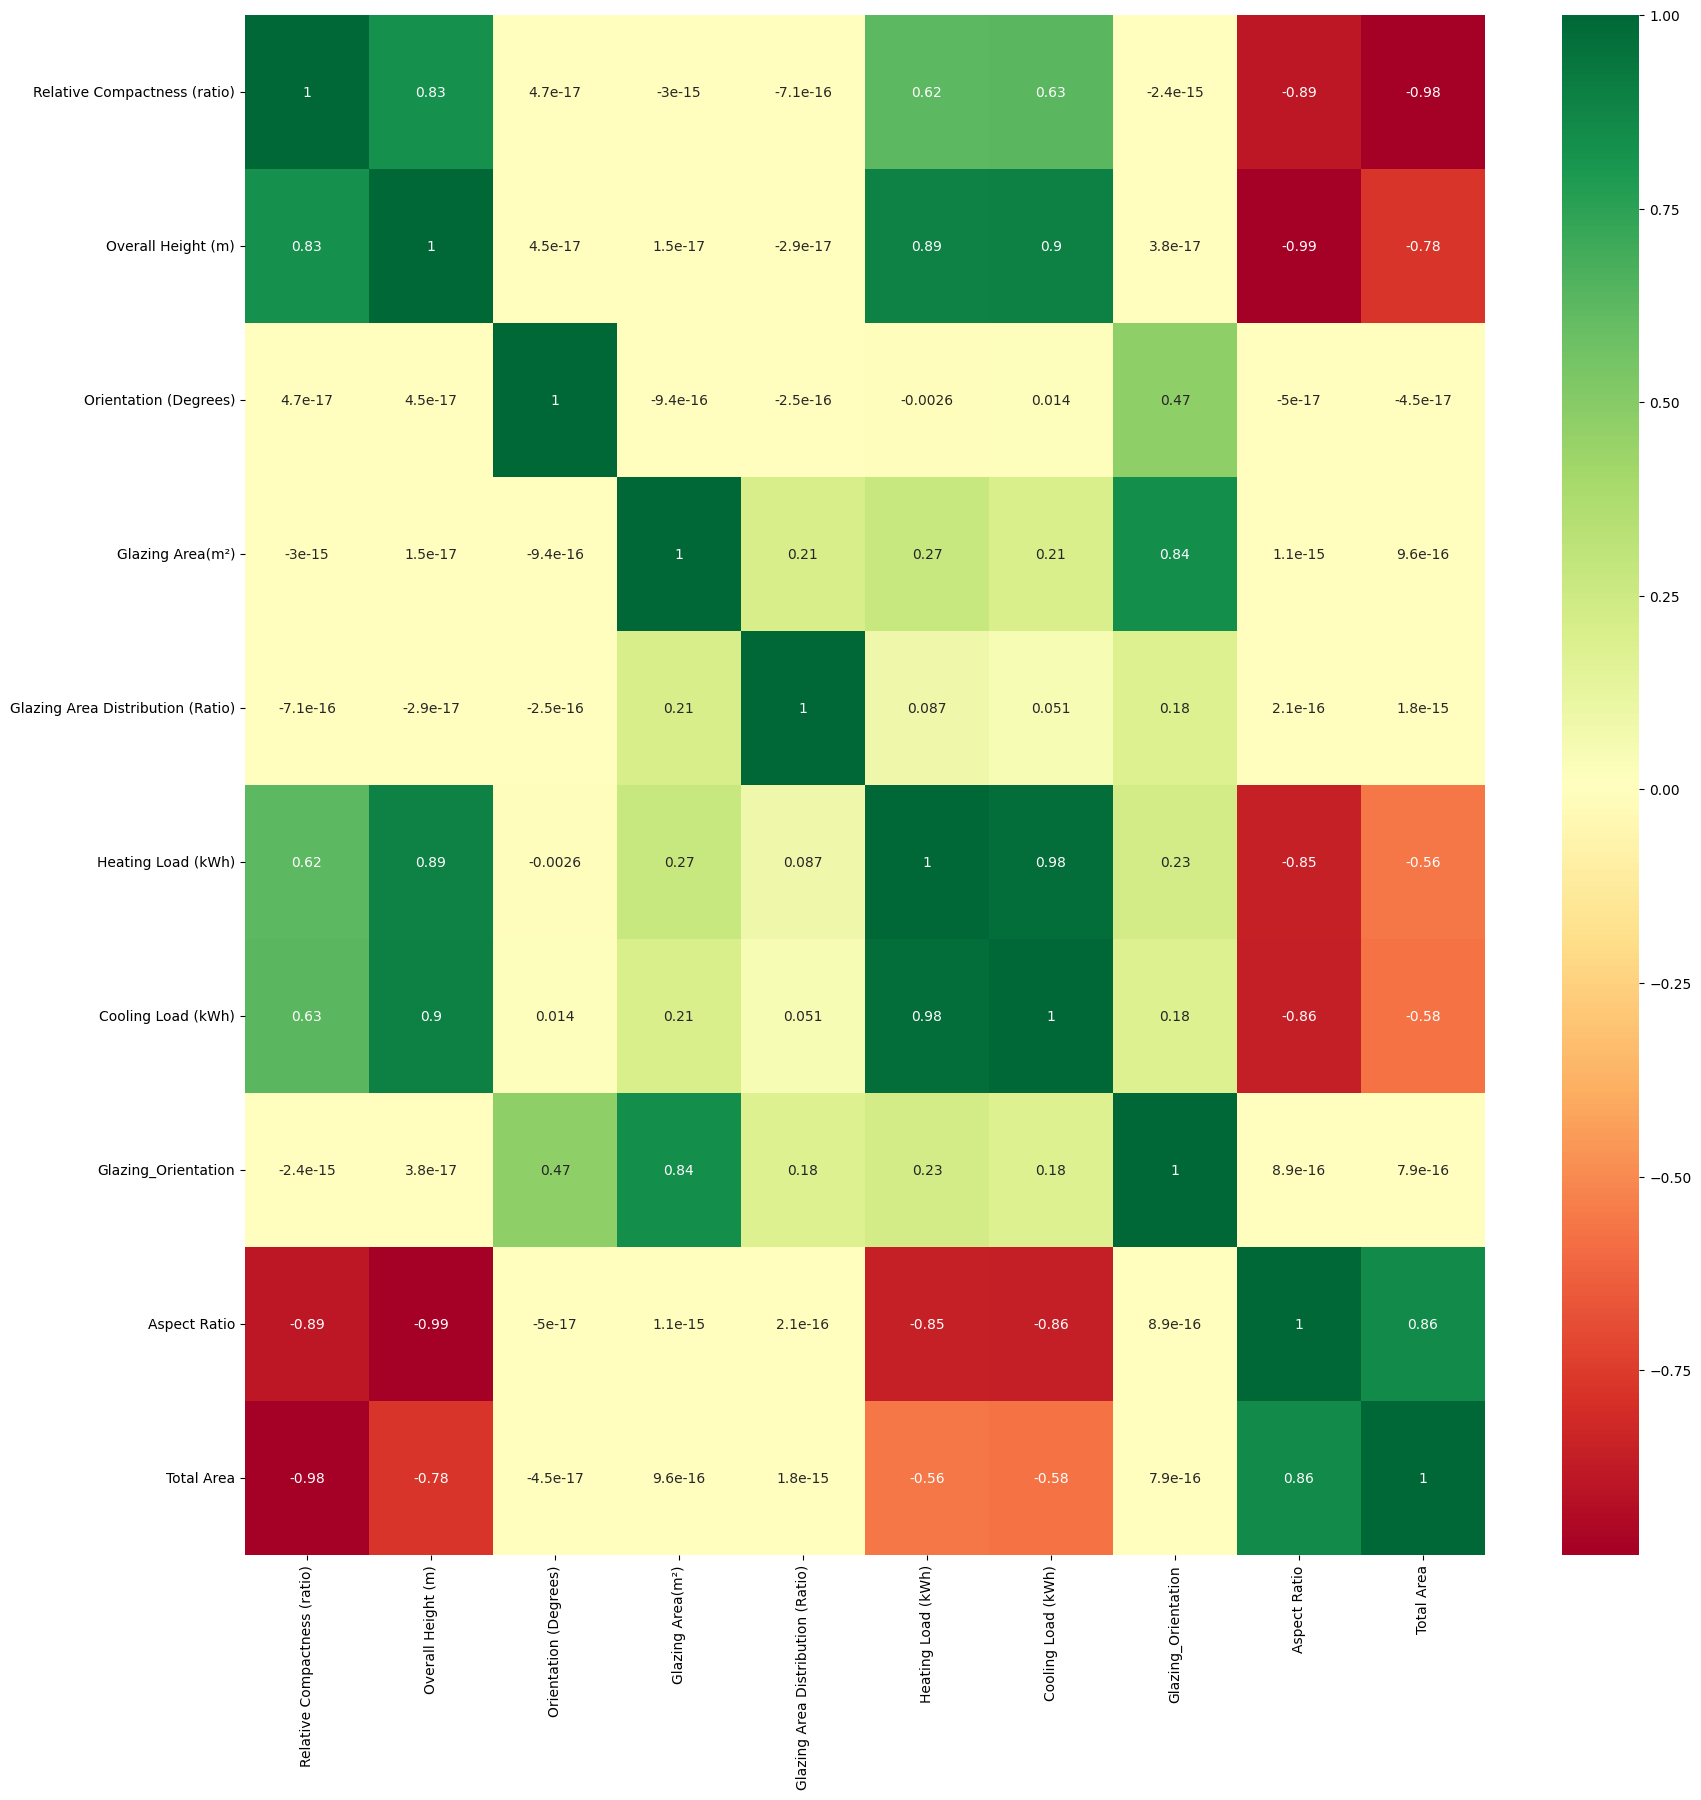

In [21]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
corrmat.index

Index(['Relative Compactness (ratio)', 'Overall Height (m)',
       'Orientation (Degrees)', 'Glazing Area(m²)',
       'Glazing Area Distribution (Ratio)', 'Heating Load (kWh)',
       'Cooling Load (kWh)', 'Glazing_Orientation', 'Aspect Ratio',
       'Total Area'],
      dtype='object')

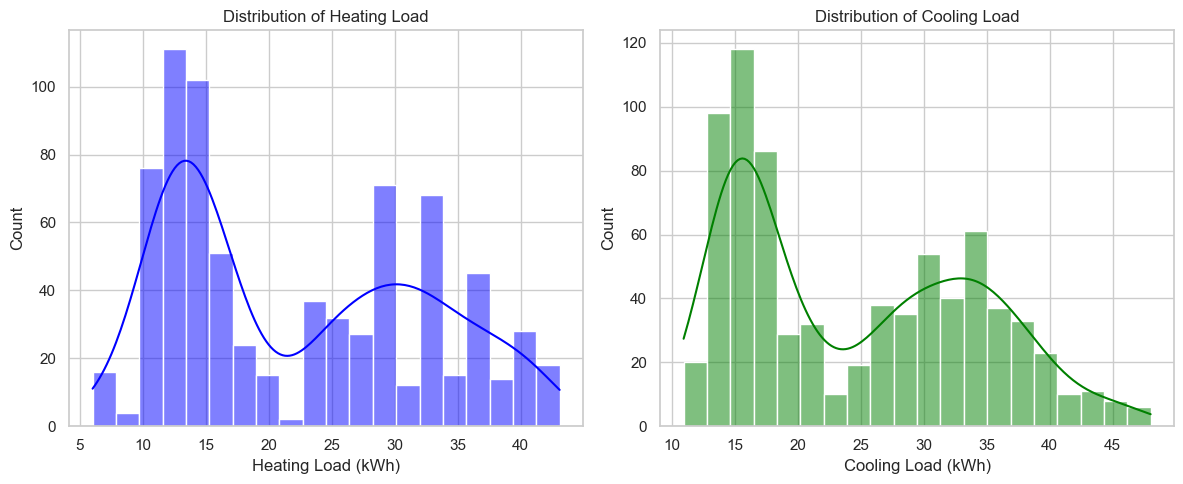

In [54]:
# Plotting histograms for target variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Heating Load (kWh)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Heating Load')

plt.subplot(1, 2, 2)
sns.histplot(df['Cooling Load (kWh)'], bins=20, kde=True, color='green')
plt.title('Distribution of Cooling Load')

plt.tight_layout()
plt.show()


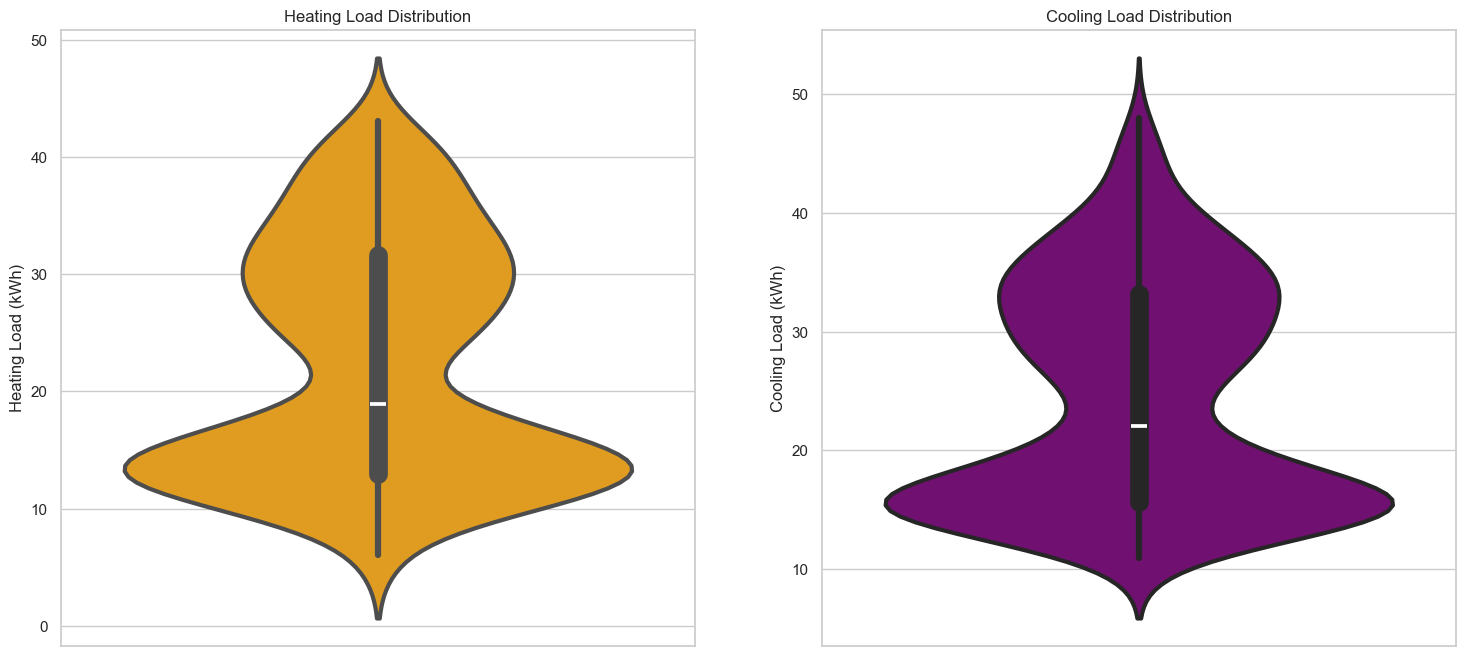

In [51]:

plt.figure(figsize=(18, 8))

# Violin plot for Heating Load
plt.subplot(1, 2, 1)
plt.title('Heating Load Distribution')
sns.violinplot(y='Heating Load (kWh)', data=df, color='orange', linewidth=3)

# Violin plot for Cooling Load
plt.subplot(1, 2, 2)
plt.title('Cooling Load Distribution')
sns.violinplot(y='Cooling Load (kWh)', data=df, color='purple', linewidth=3)

plt.show()

## Splitting Data:
- X (Independent Features) 
- y (Dependent Features)

In [55]:
X = df.drop(["Heating Load (kWh)", "Cooling Load (kWh)"], axis=1)
y = df.iloc[:, -5:-3]

In [56]:
X.head()

,Relative Compactness (ratio),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Glazing_Orientation,Aspect Ratio,Total Area
0,0.98,7.0,2,0.0,0,0.0,73.5,918.75
1,0.98,7.0,3,0.0,0,0.0,73.5,918.75
2,0.98,7.0,4,0.0,0,0.0,73.5,918.75
3,0.98,7.0,5,0.0,0,0.0,73.5,918.75
4,0.90,7.0,2,0.0,0,0.0,80.5,1004.50


In [28]:
y.head()

,Heating Load (kWh),Cooling Load (kWh)
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [159]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

[0.05665184 0.53360505 0.00309311 0.05960432 0.01092897 0.01018988
 0.29538526 0.03054158]


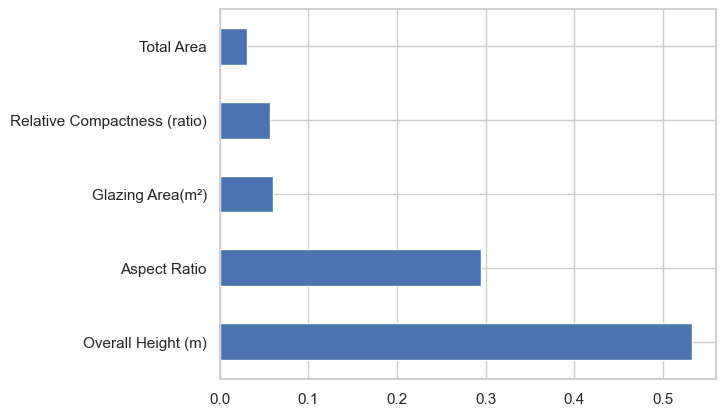

In [163]:
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Conclusion 
### The most impactful features on building energy efficiency are:
- Overall Height (m): Dominates with 53.4% importance.
- Aspect Ratio: Significant at 29.5%, influencing building heat dynamics.
- Glazing Area(m²): Contributes with 5.9%, affecting insulation and sunlight exposure.
- Relative Compactness (ratio): Holds a notable 5.7% importance, influencing spatial efficiency.
- Total Area: Relevant at 3.1%, indicating overall building size impact.

### Exploring the data distribution of upper and lower ends for Independent(target) features.

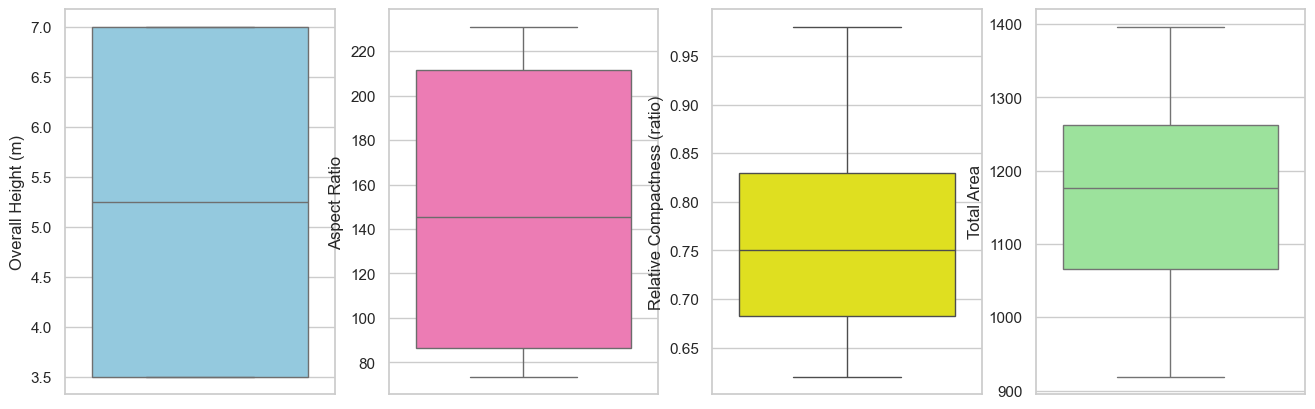

In [192]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Overall Height (m)'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Aspect Ratio'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Relative Compactness (ratio)'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Total Area'],color='lightgreen')
plt.show()

<Axes: ylabel='Density'>

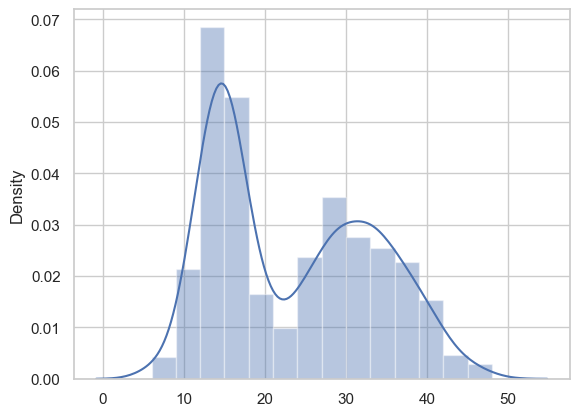

In [164]:
sns.distplot(y)

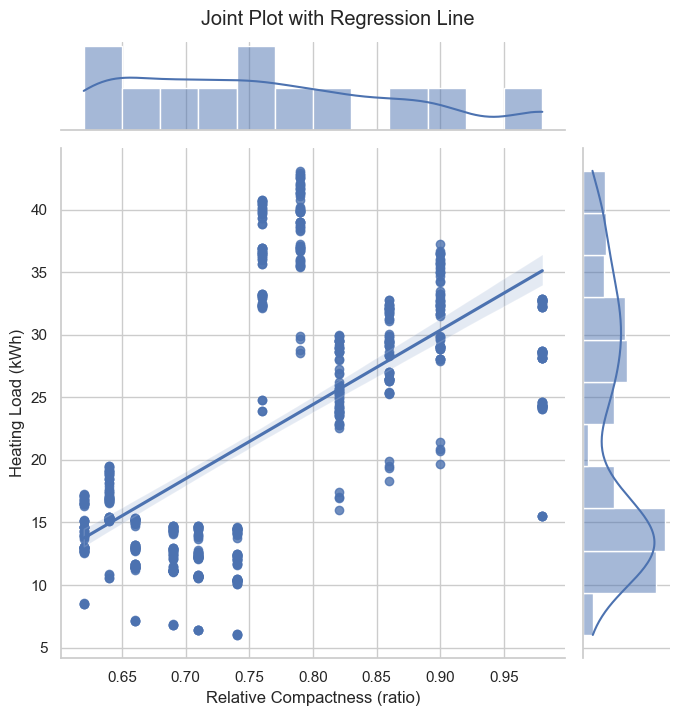

In [33]:

# Select relevant columns
selected_columns = ['Relative Compactness (ratio)', 'Heating Load (kWh)']
selected_df = df[selected_columns]

# Create a joint plot with regression line
sns.jointplot(x='Relative Compactness (ratio)', y='Heating Load (kWh)', data=selected_df, kind='reg', height=7)
plt.suptitle('Joint Plot with Regression Line', y=1.02)
plt.show()


In [41]:
unique_orientations = df['Orientation (Degrees)'].unique()
print(unique_orientations)

[2 3 4 5]


### Orientation impact

- From a physics perspective, the orientation of a building can significantly impact its energy consumption and thermal performance
- In colder climates, the orientation can affect how much sunlight the building receives, impacting passive solar heating.
- In warmer climates, the orientation can influence the amount of direct sunlight the building receives, affecting cooling needs.

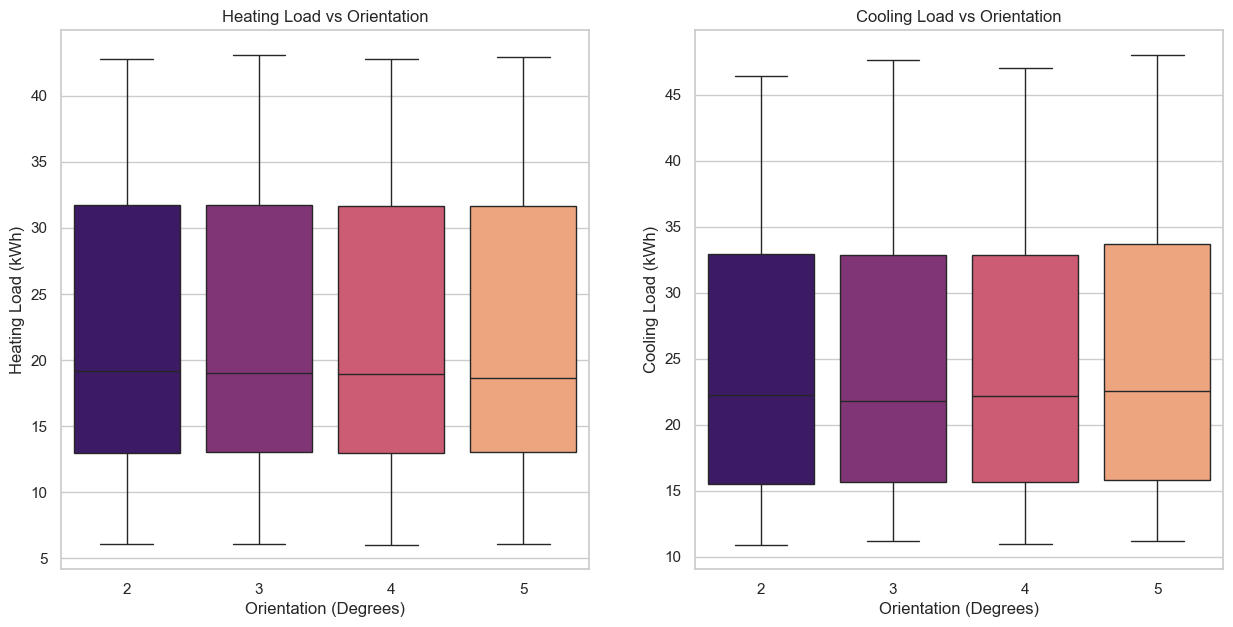

In [42]:

# Select relevant columns
selected_columns = ['Heating Load (kWh)', 'Cooling Load (kWh)', 'Orientation (Degrees)']
selected_df = df[selected_columns]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Heating Load box plot with Orientation
plt.subplot(121)
sns.boxplot(x='Orientation (Degrees)', y='Heating Load (kWh)', data=selected_df, palette='magma')
plt.title('Heating Load vs Orientation')
plt.xlabel('Orientation (Degrees)')
plt.ylabel('Heating Load (kWh)')

# Cooling Load box plot with Orientation
plt.subplot(122)
sns.boxplot(x='Orientation (Degrees)', y='Cooling Load (kWh)', data=selected_df, palette='magma')
plt.title('Cooling Load vs Orientation')
plt.xlabel('Orientation (Degrees)')
plt.ylabel('Cooling Load (kWh)')

plt.show()

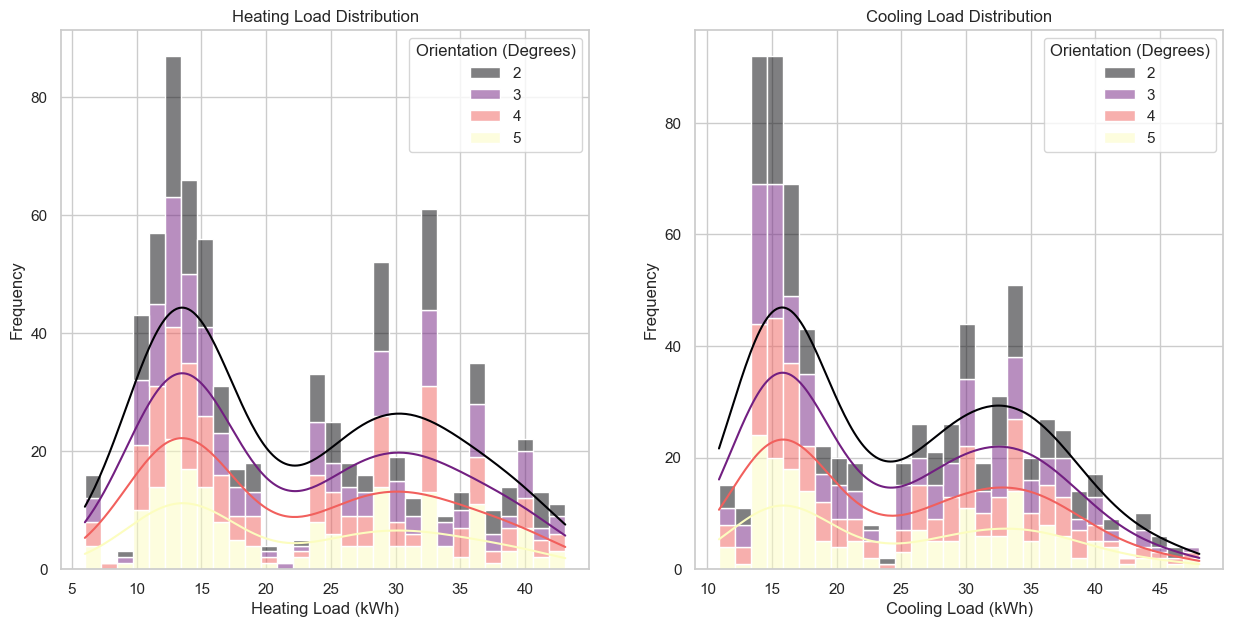

In [39]:

# Select relevant columns
selected_columns = ['Overall Height (m)', 'Aspect Ratio', 'Relative Compactness (ratio)', 'Total Area', 'Heating Load (kWh)', 'Cooling Load (kWh)', 'Orientation (Degrees)']
selected_df = df[selected_columns]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Heating Load histogram with Orientation as hue
plt.subplot(121)
sns.histplot(data=selected_df, x='Heating Load (kWh)', bins=30, kde=True, hue='Orientation (Degrees)', multiple='stack', palette='magma')
plt.title('Heating Load Distribution')
plt.xlabel('Heating Load (kWh)')
plt.ylabel('Frequency')

# Cooling Load histogram with Orientation as hue
plt.subplot(122)
sns.histplot(data=selected_df, x='Cooling Load (kWh)', bins=30, kde=True, hue='Orientation (Degrees)', multiple='stack', palette='magma')
plt.title('Cooling Load Distribution')
plt.xlabel('Cooling Load (kWh)')
plt.ylabel('Frequency')

plt.show()



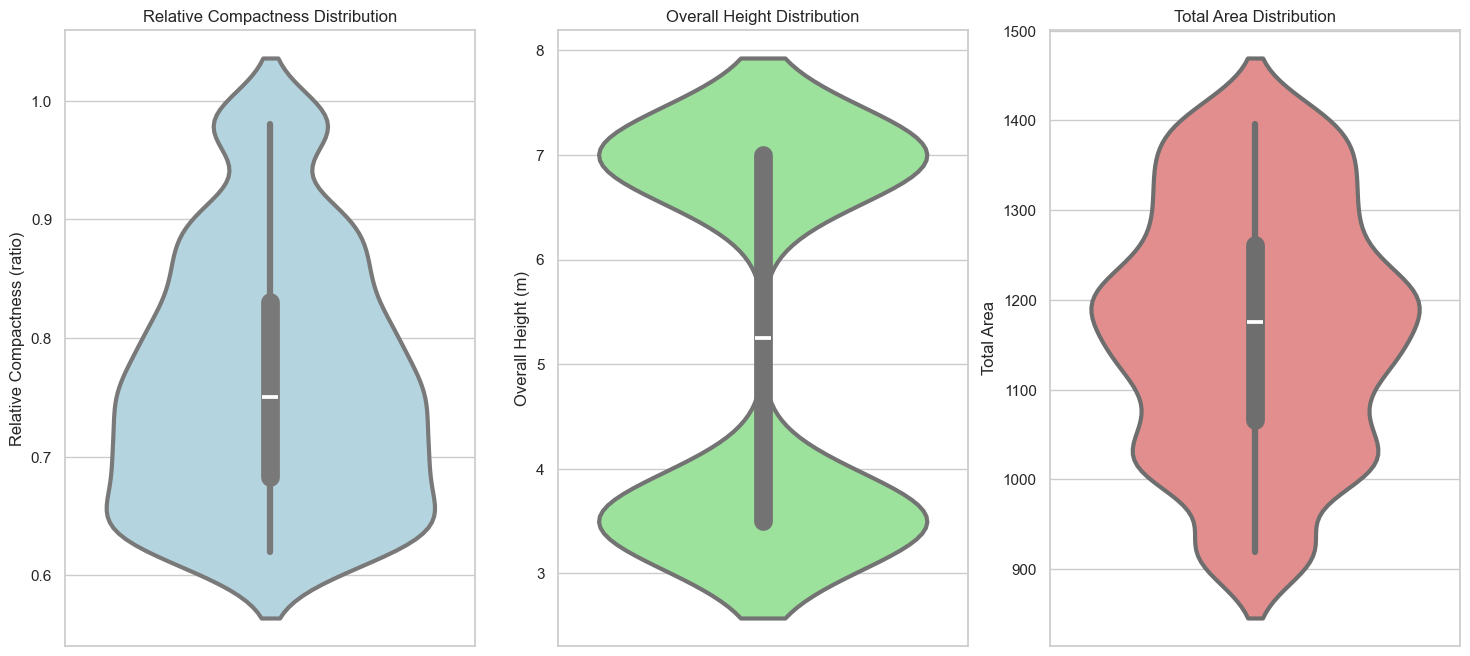

In [57]:
plt.figure(figsize=(18, 8))

# Violin plot for Relative Compactness
plt.subplot(1, 3, 1)
plt.title('Relative Compactness Distribution')
sns.violinplot(y='Relative Compactness (ratio)', data=df, color='lightblue', linewidth=3)

# Violin plot for Overall Height
plt.subplot(1, 3, 2)
plt.title('Overall Height Distribution')
sns.violinplot(y='Overall Height (m)', data=df, color='lightgreen', linewidth=3)

# Violin plot for Total Area
plt.subplot(1, 3, 3)
plt.title('Total Area Distribution')
sns.violinplot(y='Total Area', data=df, color='lightcoral', linewidth=3)

plt.show()



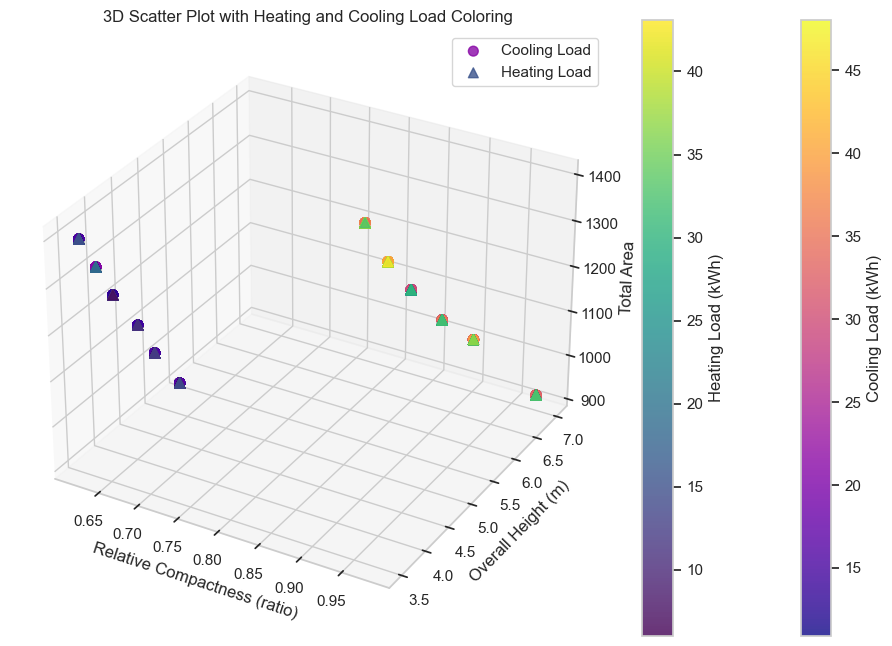

In [58]:
from mpl_toolkits.mplot3d import Axes3D

# Select relevant columns
selected_columns_3d = ['Relative Compactness (ratio)', 'Overall Height (m)', 'Total Area', 'Heating Load (kWh)', 'Cooling Load (kWh)']
selected_df_3d = df[selected_columns_3d]
# 3D Scatter plot with coloring based on Heating Load and Cooling Load
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Cooling Load
sc_cooling = ax.scatter(selected_df_3d['Relative Compactness (ratio)'],
                        selected_df_3d['Overall Height (m)'],
                        selected_df_3d['Total Area'],
                        c=selected_df_3d['Cooling Load (kWh)'],
                        cmap='plasma',
                        s=50,  # Marker size
                        marker='o',  # Marker style
                        alpha=0.8,  # Transparency
                        label='Cooling Load')

# Scatter plot for Heating Load
sc_heating = ax.scatter(selected_df_3d['Relative Compactness (ratio)'],
                        selected_df_3d['Overall Height (m)'],
                        selected_df_3d['Total Area'],
                        c=selected_df_3d['Heating Load (kWh)'],
                        cmap='viridis',
                        s=50,  # Marker size
                        marker='^',  # Marker style
                        alpha=0.8,  # Transparency
                        label='Heating Load')

ax.set_xlabel('Relative Compactness (ratio)')
ax.set_ylabel('Overall Height (m)')
ax.set_zlabel('Total Area')
ax.set_title('3D Scatter Plot with Heating and Cooling Load Coloring')
fig.colorbar(sc_cooling, ax=ax, label='Cooling Load (kWh)')
fig.colorbar(sc_heating, ax=ax, label='Heating Load (kWh)')
ax.legend()
plt.show()





### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.